In [741]:
# Python 3.11.2
# %pip install -r requriments.txt

# Python 3.10.10
# %conda install --file requriments.txt
# %conda create --name PD --file file.txt

In [742]:
# Импорт библиотек для работы с данными
import pandas as pd
import numpy as np
import scipy.stats as stats

# Импорт библиотек для визуализации данных
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Импорт библиотек для пред обработки данных
from sklearn.preprocessing import MaxAbsScaler, RobustScaler
from sklearn import preprocessing

# Импорт библиотек для отбора признаков
from sklearn.feature_selection import RFE, RFECV, SelectFromModel, SelectFpr, chi2

# Импорт библиотек для кросс валидации
from sklearn.model_selection import train_test_split

# Импорт библиотек линейной регрессии
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Poisson
from statsmodels.regression.recursive_ls import RecursiveLS
from statsmodels.regression.linear_model import OLS, GLS, GLSAR, WLS
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

# Импорт библиотек для машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Импорт библиотек для оценки качества моделей
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Подготовка данных

## Загрузка данных

In [743]:
# Загрузка данных с помощью pandas из файла csv
data = pd.read_csv("input/data.csv", delimiter=";")
year = data['Год']

# Просмотр первых 5 строк данных
data.head()

,Год,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1998,87211.83,328497.9,638450.60,228548.4,803.2,5780.87,1212184.0,33.8,83359.41,25719.20,6171.0,6642.0,111458.0,1393.30
1,1999,119302.33,695059.8,789466.92,488395.1,787.6,5823.01,1272744.0,35.2,87820.24,25262.15,7260.0,7814.0,185861.0,1807.80
2,2000,156215.00,1159034.0,962057.00,748241.8,1472.8,5865.15,1444737.0,32.4,92700.80,25720.20,8067.0,9194.0,309534.0,2185.00
3,2001,173839.00,1370182.8,1393532.20,1008088.5,1154.6,5907.28,1841258.0,30.4,98088.36,24905.88,5545.0,12637.0,418289.0,2385.26
4,2002,220396.00,1767476.7,1771073.00,1267935.2,1508.7,5961.24,2255912.0,35.1,104100.59,25084.01,6932.0,13817.0,589139.0,2918.55


### Объяснение переменных
- $y_1$ - инвестиции в основной капитал, млн руб.
- $y_2$ - валовой региональный продукт (ВРП), млн.руб.
- $y_3$ - сумма доходов населения за год, млн руб.
- $x_1$ - финансовый результат деятельности (чистая прибыль)
- $x_2$ - прямые иностранные инвестиции, млн USD
- $x_3$ - среднегодовая численности занятых, тыс чел.
- $x_4$ - стоимость основных фондов, млн. руб
- $x_5$ - степень износа основных фондов, %
- $x_6$ - затраты на научные исследования и разработки, млн руб.
- $x_7$ - объём инновационных товаров работ услуг, млн руб.
- $x_8$ - экспорт, млн USD
- $x_9$ - импорт, млн. USD
- $x_{10}$ - сумма остатков вкладов на счетах в Банке России, млн. руб.
- $x_{11}$ - прожиточный минимум в регионе РФ (г. Москва), тыс.руб.

In [744]:
class InterpolateData():
    def __init__(self, data, method='linear', freq='Q'):
        self.data = data.copy()
        self.data_quarterly = data.copy()
        self.data_quarterly['Год'] = pd.to_datetime(self.data_quarterly['Год'].astype(str), format='%Y')
        self.data_quarterly.set_index('Год', inplace=True)
        self.data_quarterly = self.data_quarterly.resample(freq).mean().interpolate(method=method)

    def head(self):
        return self.data_quarterly.head()

    def scatter(self):
        return px.scatter(self.data_quarterly)

    def original_scatter(self):
        return px.scatter(self.data.drop(columns=['Год']))

    def after_interpolate(self):
        return self.data_quarterly

In [745]:
# InterpolateData(data).scatter()
# InterpolateData(data, method='cubic').scatter()
# InterpolateData(data, method='quadratic').scatter()
InterpolateData(data, method='akima').scatter()

In [746]:
InterpolateData(data).original_scatter()

In [747]:
data = InterpolateData(data, method='akima').after_interpolate()
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-03-31,87211.830000,328497.900000,638450.600000,228548.400000,803.200000,5780.870000,1.212184e+06,33.800000,83359.410000,25719.200000,6171.000000,6642.000000,111458.000000,1393.300000
1998-06-30,94837.309463,411892.838304,674544.769921,293398.535166,736.807795,5791.387033,1.217777e+06,34.608070,84434.697999,25523.220133,6463.512671,6918.993559,124811.328689,1499.653740
1998-09-30,102889.910331,502956.211813,712651.354330,358916.449175,715.808030,5802.012446,1.231037e+06,35.205168,85548.268093,25385.183334,6737.509484,7214.574151,140986.309803,1604.366468
1998-12-31,111150.973194,598751.486752,751524.460148,424389.258043,735.228912,5812.630376,1.250140e+06,35.444336,86686.056887,25300.419162,7001.119718,7517.765363,161117.650948,1707.432327
1999-03-31,119302.330000,695059.800000,789466.920000,488395.100000,787.600000,5823.010000,1.272744e+06,35.200000,87820.240000,25262.150000,7260.000000,7814.000000,185861.000000,1807.800000


## Изучение данных на наличие ошибок измерений

Функция combine_scatter_plots строит графики рассеяния для каждой пары признаков в наборе данных.

In [748]:
def combine_scatter_plots(height=1000, width=1100):
    fig = make_subplots(rows=5, cols=3)
    for i, column in enumerate(data.columns.values):
        if 0 <= i < 3:
            row, col = 1, i + 1
        elif 3 <= i < 6:
            row, col = 2, i + 1 - 3
        elif 6 <= i < 9:
            row, col = 3, i + 1 - 6
        elif 9 <= i < 12:
            row, col = 4, i + 1 - 9
        else:
            row, col = 5, i + 1 - 12

        if 0 <= i < 3:
            fig.add_trace(go.Scatter(y=data[f'y{i + 1}'], x=year, name=column), row=row, col=col)
        else:
            fig.add_trace(go.Scatter(y=data[f'x{i - 2}'], x=year, name=column), row=row, col=col)
    fig.update_layout(height=height, width=width, title_text="Зависимость признаков от времени")
    fig.show()

In [749]:
combine_scatter_plots()

## Проверка данных на наличие выбросов и изучение распределения данных

Функция combine_box_plots строит ящиковые диаграммы для каждого признака в наборе данных, где значения признака разбиваются на квартили и представляются в виде ящика.

Функция combine_violin_plots строит аналогичные диаграммы, но вместо ящика используется график, который представляет распределение значений признака с помощью ядерной оценки плотности.

In [750]:
# Построение графиков
def combine_box_plots(height=1000, width=1100):
    fig = make_subplots(rows=5, cols=3)
    for i, column in enumerate(data.columns.values):
        if 0 <= i < 3:
            row, col = 1, i + 1
        elif 3 <= i < 6:
            row, col = 2, i + 1 - 3
        elif 6 <= i < 9:
            row, col = 3, i + 1 - 6
        elif 9 <= i < 12:
            row, col = 4, i + 1 - 9
        else:
            row, col = 5, i + 1 - 12

        if 0 <= i < 3:
            fig.add_trace(go.Box(x=data[f'y{i + 1}'], name=column), row=row, col=col)
        else:
            fig.add_trace(go.Box(x=data[f'x{i - 2}'], name=column), row=row, col=col)
    fig.update_layout(height=height, width=width, title_text="Ящиковые диаграммы распределения признаков",
                      showlegend=False)
    fig.show()


def combine_violin_plots(height=1500, width=1100):
    fig = make_subplots(rows=5, cols=3)
    for i, column in enumerate(data.columns.values):
        if 0 <= i < 3:
            row, col = 1, i + 1
        elif 3 <= i < 6:
            row, col = 2, i + 1 - 3
        elif 6 <= i < 9:
            row, col = 3, i + 1 - 6
        elif 9 <= i < 12:
            row, col = 4, i + 1 - 9
        else:
            row, col = 5, i + 1 - 12

        if 0 <= i < 3:
            fig.add_trace(go.Violin(x=data[f'y{i + 1}'], name=column), row=row, col=col)
        else:
            fig.add_trace(go.Violin(x=data[f'x{i - 2}'], name=column), row=row, col=col)
    fig.update_layout(height=height, width=width, title_text="Распределение признаков", showlegend=False)
    fig.show()

In [751]:
combine_box_plots()

In [752]:
# combine_violin_plots()

## Избавление от мультиколлинеарности между признаками путем нормализации и центрирования данных

In [753]:
# Центрирование данных для избавления от мультиколлинеарности
# data = data.apply(lambda x: x - x.mean())

# Минимаксная нормализация данных
data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Нормализация средним (Z-нормализация)
# data = data.apply(lambda x: (x - x.mean()) / x.std())

# MaxAbsScaler
# transformer = MaxAbsScaler().fit(data)
# data = pd.DataFrame(transformer.transform(data))

# RobustScaler
# transformer = RobustScaler().fit(data)
# data = pd.DataFrame(transformer.transform(data))

data.columns = ['y1', 'y2', 'y3', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-03-31,0.000000,0.000000,0.000000,0.000000,0.000549,0.000000,0.000000,0.195697,0.000000,0.001083,0.002159,0.000000,0.000000,0.000000
1998-06-30,0.001461,0.003661,0.002672,0.007145,0.000132,0.012626,0.000074,0.242208,0.002618,0.000874,0.003168,0.002142,0.000315,0.006140
1998-09-30,0.003004,0.007658,0.005493,0.014364,0.000000,0.025383,0.000250,0.276576,0.005330,0.000727,0.004113,0.004428,0.000697,0.012186
1998-12-31,0.004587,0.011863,0.008371,0.021578,0.000122,0.038130,0.000503,0.290342,0.008100,0.000637,0.005022,0.006773,0.001172,0.018136
1999-03-31,0.006149,0.016090,0.011180,0.028630,0.000451,0.050591,0.000802,0.276278,0.010861,0.000596,0.005915,0.009064,0.001756,0.023931


## Добавление шума в данные

In [754]:
# px.scatter(data, title="Зависимость признаков от времени", height=500)
px.scatter(data['y1'], title="Зависимость признаков от времени", height=500)

In [755]:
noise = np.random.normal(0, .06, data.shape)
noisy_data = data + noise
data = noisy_data
data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
px.scatter(data['y1'], title="Зависимость признаков от времени", height=500)

In [756]:
combine_scatter_plots()

# Матрица коэффициентов межфакторной корреляции

In [757]:
fig = px.imshow(data.corr(), text_auto='.2f', color_continuous_scale="gnbu")
fig.update_layout(height=1000, title_text="Матрица коэффициентов межфакторной корреляции")
fig.show()

In [758]:
# un_data = data.copy()
# un_data.columns = ['Инвестиции в основной капитал, млн руб. y1', 'Валовой региональный продукт (ВРП), млн.руб. y2',
#                    'Сумма доходов населения за год, млн руб. y3',
#                    'Финансовый результат деятельности (чистая прибыль), млн.руб. x1',
#                    'Прямые иностранные инвестиции, млн USD x2',
#                    'Среднегодовая численности занятых, тыс чел. x3', 'Стоимость основных фондов, млн. руб. x4',
#                    'Степень износа основных фондов, % x5',
#                    'Затраты на научные исследования и разработки, млн руб. x6',
#                    'Объём инновационных товаров работ услуг, млн руб. x7', 'Экспорт, млн USD x8',
#                    'Импорт, млн. USD x9', 'Сумма остатков вкладов на счетах в Банке России, млн. руб. x10',
#                    'Прожиточный минимум в регионе РФ (г. Москва), тыс.руб. x11']
#
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(un_data.corr(), annot=True, fmt=".2f", linewidth=.5, cmap='cubehelix')

# Исследование данных на наличие выбросов и создание на тестовой и обучающей выборки

Нахождение выбросов - это один из методов анализа данных, который используется для выявления аномальных значений в наборе данных. Выбросы могут возникать из-за ошибок в данных, случайных вариаций или из-за наличия редких, но реальных экстремальных значений.

Существует несколько методов нахождения выбросов, в том числе метод Z-оценки и метод межквартильного размаха (IQR).

In [759]:
# Смотрим размерность данных
data.shape

(97, 14)

Изначально мы имели набор данных, состоящий из 25 значений, охватывающих период с 1998 по 2022 год. На это нам указывает размерность данных (25, 14).

**Z-оценка**

Метод Z-оценки основан на расчете Z-оценки для каждого значения в наборе данных и проверке, насколько далеко каждое значение от среднего значения. Значения, которые находятся на расстоянии больше чем три стандартных отклонения от среднего, могут быть считаны выбросами.

In [760]:
z = np.abs(stats.zscore(data))
data_clean = data[(z < 3).all(axis=1)]
data_clean.shape

(97, 14)

**Межквартильный размах (IQR)**

Метод межквартильного размаха (IQR) основан на вычислении интерквартильного размаха - разницы между 75-перцентилью и 25-перцентилем. Затем определяется верхняя и нижняя границы выбросов, которые определяются как 1,5 межквартильных размаха за пределами верхнего и нижнего квартилей.

In [761]:
# Находим Первый квартиль (Q1) и Третий квартиль (Q3) и рассчитываем межквартильный размах
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

# Оставляем только те значения, которые больше нижней границы и меньше верхней границы.
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean.shape

(94, 14)

В результате проверки на наличие выбросов мы получили исходный набор данных, состоящий из 25 значений, охватывающих период с 1998 по 2022 год. На это нам указывает размерность данных (25, 14). Это говорит нам о том что выбросов в данных найденно не было.

In [762]:
# Заменяем исходный набор данных на очищенный
data = data_clean

### Создание на тестовой и обучающей выборки

In [763]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['y1', 'y2', 'y3'], axis=1), data[['y1', 'y2', 'y3']],
                                                    test_size=0.30, random_state=42)

In [764]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 11), (29, 11), (65, 3), (29, 3))

# Построение модели линейной регрессии

Линейная регрессия - это метод анализа данных, который используется для описания и прогнозирования линейной связи между зависимой и одной или несколькими независимыми переменными. Он часто используется в статистическом анализе данных для построения математической модели, которая может быть использована для прогнозирования значений зависимой переменной на основе значений независимых переменных.

Для построения модели линейной регрессии необходимо иметь набор данных, который состоит из пар значений зависимой и независимой переменных. Затем на основе этих данных проводится анализ, который позволяет оценить параметры модели - коэффициенты наклона и пересечения. Эти параметры могут быть использованы для построения уравнения линейной регрессии.

Для оценки качества модели линейной регрессии используются различные статистические показатели, такие как коэффициент детерминации (R-квадрат) или корреляционный коэффициент. Они позволяют оценить, насколько хорошо модель соответствует данным и насколько точно она может использоваться для прогнозирования значений зависимой переменной.

Важно понимать, что линейная регрессия является моделью, которая описывает только линейные отношения между переменными. Если связь между переменными не является линейной, то модель линейной регрессии может оказаться неэффективной и требовать использования других методов анализа данных.

In [765]:
class CustomLinearRegression:
    def __init__(self, y, x, model_type=OLS):
        self.model_type = model_type
        self.y = y
        self.x = x
        self.model = self.model_type(self.y, self.x).fit()

    def get_coefficients(self):
        print(self.model.params)
        answer = []
        names = self.x.columns.values.tolist()
        for i, par in enumerate(self.model.params):
            answer.append(f'+ {par:.4f}{names[i][0]}_{{{names[i][1:]}}}')
        print(f'$$\hat {self.y.name[0]}_{self.y.name[1]} = {" ".join(answer)[2:]}$$')

    def summary(self):
        print(self.model.summary())

    def pre(self, X_test):
        return self.model.predict(X_test)

    def predict(self, X_test, y_test):
        r2 = r2_score(y_test, self.model.predict(X_test))
        mae = mean_absolute_error(y_test, self.model.predict(X_test))
        mse = mean_squared_error(y_test, self.model.predict(X_test))
        print(
            f'Коэффициент детерминации (R^2): {r2 * 100:.1f}%\nCредняя ошибка аппроксимации (MAE): {mae * 100:.1f}%\nCредняя квадратичная ошибка (MSE): {mse * 100:.1f}%')

    def F(self):
        return self.model.fvalue

    def current_p(self, index):
        return self.model.f_pvalue[index]

    def forward_selection(self):
        xi = []
        stop = False
        x_new = []  # список переменных, которые будут включены в модель
        x_len = len(self.x.columns) - 1  # количество столбцов в датафрейме
        x_test = []
        for n in range(x_len):
            F_max = 0  # максимальное значение F
            p_max = 0  # максимальное значение p
            F_max_i = 0
            F_max_x = ''
            if not stop:
                for i in range(x_len):
                    if i not in xi:
                        x_test = x_new.copy()
                        x_test.append(self.x.columns[i])
                        F = CustomLinearRegression(self.y, self.x.loc[:, x_test]).F()
                        print(f"'x{i + 1}',", F)
                        if F > F_max:
                            F_max = F
                            F_max_i = i
                            F_max_x = f"x{i + 1}"
                x_new.append(F_max_x)
                xi.append(F_max_i)
                print(x_new)
                for j in range(len(x_new)):
                    p = CustomLinearRegression(self.y, self.x.loc[:, x_new]).current_p(j)
                    if p > 0.05:
                        stop = True
                        print(f'P-value: {p}')
                        break
        CustomLinearRegression(self.y, self.x.loc[:, x_new[:-1]]).summary()

    def backward_elimination(self, p=0.05, start=0):
        regression = self.model_type(self.y, self.x).fit()
        futures_num = len(self.x.columns)
        for i in range(futures_num):
            regression = self.model_type(self.y, self.x).fit()
            max_p = max(regression.pvalues.values[start:])
            if max_p > p:
                for j in range(0, futures_num - i):
                    if regression.pvalues[j] == max_p:
                        self.x = self.x.drop(self.x.columns[[j]], axis=1)
        print(regression.summary())

    def custom_feature_selection(self, x, y, model=LinearRegression(), selection_method=RFE):
        result_list = list()
        result = selection_method(model).fit(x, y)
        for i, feature in enumerate(result.get_support()):
            if feature:
                result_list.append(f'x{i + 1}')
        CustomLinearRegression(y, x[result_list]).summary()

    def correlation_map(self):
        return px.imshow(self.x.corr(), text_auto='.2f', color_continuous_scale="gnbu")


class CustomLinearRegressionWithConst(CustomLinearRegression):
    def __init__(self, y, x, model_type=OLS):
        super().__init__(y, x, model_type)
        self.x = sm.add_constant(self.x)
        self.model = self.model_type(self.y, self.x).fit()

    def backward_elimination(self, p=0.05, start=1):
        regression = self.model_type(self.y, self.x).fit()
        futures_num = len(self.x.columns)
        for i in range(futures_num):
            self.x = sm.add_constant(self.x)
            regression = self.model_type(self.y, self.x).fit()
            max_p = max(regression.pvalues.values[start:])
            if max_p > p:
                for j in range(0, futures_num - i):
                    if regression.pvalues[j] == max_p:
                        self.x = self.x.drop(self.x.columns[[j]], axis=1)
        print(regression.summary())


class CustomLinearRegressionReg(CustomLinearRegression):
    def __init__(self, y, x, model_type=OLS):
        super().__init__(y, x, model_type)
        self.model = sm.OLS(self.y, self.x).fit_regularized(alpha=1., L1_wt=0.5, refit=True)

# class CustomRidgeLinearRegression(CustomLinearRegression):
#     def __init__(self, y, x, model_type=OLS):
#         super().__init__(y, x, model_type)
#         self.model = Ridge(alpha=0.1).fit(self.x, self.y)

# Отбор переменных для модели линейной регрессии

Отбор переменных для модели линейной регрессии - это процесс выбора наиболее важных и значимых независимых переменных, которые будут использоваться в модели для прогнозирования зависимой переменной. Это важный шаг в построении модели, так как использование неподходящих переменных может привести к низкой точности прогнозов и низкому качеству модели.

Существует несколько методов отбора переменных для модели линейной регрессии, включая:

- Метод пошагового отбора переменных - это метод, который включает или исключает независимые переменные в модель пошагово на основе их значимости. На каждом шаге происходит выбор переменной, которая наиболее улучшает качество модели.

- Метод отбора на основе значимости - этот метод основан на анализе значимости каждой независимой переменной с помощью статистических тестов, таких как t-тест или F-тест. Переменные с низким уровнем значимости исключаются из модели.

- Метод регуляризации - это метод, который добавляет штрафы за большие значения коэффициентов в модель. Он позволяет автоматически отбирать переменные, которые наиболее важны для модели, и уменьшает вероятность переобучения.

- Метод отбора на основе информационных критериев - этот метод основан на использовании различных информационных критериев, таких как AIC (критерий Акаике) и BIC (критерий Шварца), чтобы выбрать модель с наименьшей ошибкой.

Выбор метода отбора переменных зависит от конкретной задачи и объема доступных данных. Важно также учитывать возможную мультиколлинеарность между независимыми переменными, что может привести к искажению результатов. Поэтому важно проводить анализ и выбор переменных внимательно и осознанно.

Сначала посмотрим на данные, которые мы будем использовать для построения модели линейной регрессии.

In [766]:
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-03-31,0.184518,0.041733,0.046680,0.062171,0.162737,0.000000,0.121276,0.142696,0.092572,0.126608,0.000000,0.064303,0.081283,0.000000
1998-06-30,0.072793,0.019171,0.058119,0.000000,0.122817,0.003893,0.083818,0.237545,0.044282,0.114691,0.104756,0.017012,0.079157,0.091052
1998-09-30,0.065488,0.093768,0.045709,0.131042,0.209240,0.085497,0.000000,0.279893,0.122736,0.122664,0.135042,0.037930,0.057785,0.013411
1998-12-31,0.079959,0.051235,0.071445,0.093791,0.119998,0.036114,0.183874,0.257172,0.069467,0.141635,0.065864,0.000316,0.052694,0.101332
1999-03-31,0.054231,0.018450,0.000000,0.139087,0.161265,0.075606,0.168848,0.377646,0.049646,0.088308,0.128932,0.004462,0.115316,0.060860


Мы имеем дело с набором данных, содержащим 11 независимых переменных и 3 зависимых переменных. Переменные x1-x11 являются независимыми переменными, а переменные y1-y3 являются зависимыми переменными. Всего у нас 25 наблюдений. Разделим данные на независимые и зависимые переменные.

### Разделение данных на зависимые и независимые переменные

Зависимые переменные - это переменные, значения которых мы хотим предсказать. В нашем случае это переменные y1, y2 и y3.

In [767]:
y1_test, y1_train = y_test['y1'], y_train['y1']
y2_test, y2_train = y_test['y2'], y_train['y2']
y3_test, y3_train = y_test['y3'], y_train['y3']

Независимые переменные - это переменные, значения которых мы используем для прогнозирования зависимых переменных. В нашем случае это переменные x1-x11.

In [768]:
x1_test, x1_train = X_test['x1'], X_train['x1']
x2_test, x2_train = X_test['x2'], X_train['x2']
x3_test, x3_train = X_test['x3'], X_train['x3']
x4_test, x4_train = X_test['x4'], X_train['x4']
x5_test, x5_train = X_test['x5'], X_train['x5']
x6_test, x6_train = X_test['x6'], X_train['x6']
x7_test, x7_train = X_test['x7'], X_train['x7']
x8_test, x8_train = X_test['x8'], X_train['x8']
x9_test, x9_train = X_test['x9'], X_train['x9']
x10_test, x10_train = X_test['x10'], X_train['x10']
x11_test, x11_train = X_test['x11'], X_train['x11']

# Оценка предварительно составленных систем уравнений

Всего у нас три системы уравнений, которые мы можем использовать для прогнозирования зависимых переменных
- Система независимых уравнений;
- Система рекурсивных уравнений;
- Система одновременных уравнений.

#### Система независимых уравнений
$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + b_{21}x_{1} + b_{22}x_{2} + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\
y_3 = a_3 + b_{31}x_{1} + b_{32}x_{2} + b_{33}x_{3} + b_{34}x_{4} + b_{35}x_{5} + b_{36}x_{6} + b_{37}x_{7} + b_{38}x_{8} + b_{39}x_{9} + b_{310}x_{10} + b_{311}x_{11} + \epsilon \\
\end{cases}
$$

#### Система рекурсивных уравнений
$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + a_{21}y_1 + b_{21}x_{3} + b_{22}x_{4} + b_{23}x_{5} + b_{24}x_{6} + b_{25}x_{7} + b_{26}x_{8} + b_{27}x_{9} + \epsilon \\
y_3 = a_3 + a_{31}y_1 + a_{32}y_2 + b_{31}x_{11} + \epsilon \\
\end{cases}
$$

#### Система одновременных уравнений
$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + a_{21}y_1 + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\
y_3 = a_3 + a_{31}y_1 + b_{310}x_{10} + b_{311}x_{11} + \epsilon \\
\end{cases}
$$

## Система независимых уравнений

$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + b_{21}x_{1} + b_{22}x_{2} + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\
y_3 = a_3 + b_{31}x_{1} + b_{32}x_{2} + b_{33}x_{3} + b_{34}x_{4} + b_{35}x_{5} + b_{36}x_{6} + b_{37}x_{7} + b_{38}x_{8} + b_{39}x_{9} + b_{310}x_{10} + b_{311}x_{11} + \epsilon \\
\end{cases}
$$

### Первое уравнение

$$y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon $$

#### Исходная система уравнений

In [769]:
fn1_nez = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, fn1_nez).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              305.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    3.91e-33
Time:                        09:38:30   Log-Likelihood:                          51.012
No. Observations:                  65   AIC:                                     -98.02
Df Residuals:                      63   BIC:                                     -93.67
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [770]:
CustomLinearRegression(y1_train, fn1_nez).backward_elimination()

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              305.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    3.91e-33
Time:                        09:38:30   Log-Likelihood:                          51.012
No. Observations:                  65   AIC:                                     -98.02
Df Residuals:                      63   BIC:                                     -93.67
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [771]:
final_fn1_nez = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, final_fn1_nez).get_coefficients()

x1    0.407982
x2    0.181211
dtype: float64
$$\hat y_1 = 0.4080x_{1} + 0.1812x_{2}$$


$$\hat y_1 = 0.3800x_{1} + 0.2251x_{2}$$

In [772]:
fig = make_subplots(rows=1, cols=2)
fig.update_yaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y1_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X1', row=1, col=1)

fig.add_trace(px.scatter(x=x2_train, y=y1_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X2', row=1, col=2)

fig.update_layout(title_text="График рассеяния")
fig.show()

### Второе уравнение

$$y_2 = a_2 + b_{21}x_{1} + b_{22}x_{2} + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon$$

#### Исходная система уравнений

In [773]:
fn2_nez = pd.concat([x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train], axis=1)
CustomLinearRegression(y2_train, fn2_nez).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              325.4
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    5.52e-45
Time:                        09:38:30   Log-Likelihood:                          79.033
No. Observations:                  65   AIC:                                     -140.1
Df Residuals:                      56   BIC:                                     -120.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [774]:
CustomLinearRegression(y2_train, fn2_nez).backward_elimination()

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              989.9
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    2.70e-52
Time:                        09:38:30   Log-Likelihood:                          76.235
No. Observations:                  65   AIC:                                     -146.5
Df Residuals:                      62   BIC:                                     -139.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [775]:
final_fn2_nez = pd.concat([x1_train, x6_train, x7_train], axis=1)
CustomLinearRegression(y2_train, final_fn2_nez).get_coefficients()

x1    0.189390
x6    0.911426
x7   -0.045080
dtype: float64
$$\hat y_2 = 0.1894x_{1} + 0.9114x_{6} + -0.0451x_{7}$$


$$\hat y_2 = 0.1463x_{1} + 0.7211x_{6} + 0.0471x_{7}$$

In [776]:
fig = make_subplots(rows=1, cols=3)
fig.update_yaxes(title_text='Y2', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y2_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X1', row=1, col=1)

fig.add_trace(px.scatter(x=x6_train, y=y2_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X6', row=1, col=2)

fig.add_trace(px.scatter(x=x7_train, y=y2_train).data[0], row=1, col=3)
fig.update_xaxes(title_text='X7', row=1, col=3)

fig.update_layout(title='Графики рассеяния')
fig.show()

### Третье уравнение

$$y_3 = a_3 + b_{31}x_{1} + b_{32}x_{2} + b_{33}x_{3} + b_{34}x_{4} + b_{35}x_{5} + b_{36}x_{6} + b_{37}x_{7} + b_{38}x_{8} + b_{39}x_{9} + b_{310}x_{10} + b_{311}x_{11} + \epsilon$$

#### Исходная система уравнений

In [777]:
fn3_nez = pd.concat(
    [x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train, x10_train, x11_train],
    axis=1)
CustomLinearRegression(y3_train, fn3_nez).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y3   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              314.0
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    8.65e-45
Time:                        09:38:30   Log-Likelihood:                          91.879
No. Observations:                  65   AIC:                                     -161.8
Df Residuals:                      54   BIC:                                     -137.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [778]:
CustomLinearRegression(y3_train, fn3_nez).backward_elimination()

                                 OLS Regression Results                                
Dep. Variable:                     y3   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              1690.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    1.86e-55
Time:                        09:38:30   Log-Likelihood:                          86.249
No. Observations:                  65   AIC:                                     -168.5
Df Residuals:                      63   BIC:                                     -164.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [779]:
final_fn3_nez = pd.concat([x1_train, x3_train, x4_train, x5_train, x10_train], axis=1)
CustomLinearRegression(y3_train, final_fn3_nez).get_coefficients()

x1     0.233196
x3     0.109570
x4     0.222522
x5     0.049366
x10    0.310796
dtype: float64
$$\hat y_3 = 0.2332x_{1} + 0.1096x_{3} + 0.2225x_{4} + 0.0494x_{5} + 0.3108x_{10}$$


$$\hat y_3 = 0.2652x_{1} + 0.1689x_{3} + 0.2582x_{4} - 0.0136x_{5} + 0.2652x_{10}$$

In [780]:
fig = make_subplots(rows=2, cols=3)
fig.update_yaxes(title_text='Y3', row=1, col=1)
fig.update_yaxes(title_text='Y3', row=2, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y3_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X1', row=1, col=1)

fig.add_trace(px.scatter(x=x3_train, y=y3_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X3', row=1, col=2)

fig.add_trace(px.scatter(x=x4_train, y=y3_train).data[0], row=1, col=3)
fig.update_xaxes(title_text='X4', row=1, col=3)

fig.add_trace(px.scatter(x=x5_train, y=y3_train).data[0], row=2, col=1)
fig.update_xaxes(title_text='X5', row=2, col=1)

fig.add_trace(px.scatter(x=x10_train, y=y3_train).data[0], row=2, col=2)
fig.update_xaxes(title_text='X10', row=2, col=2)

fig.update_layout(height=800, title='Графики рассеяния')
fig.show()

## Система рекурсивных уравнений

$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + a_{21}y_1 + b_{21}x_{3} + b_{22}x_{4} + b_{23}x_{5} + b_{24}x_{6} + b_{25}x_{7} + b_{26}x_{8} + b_{27}x_{9} + \epsilon \\
y_3 = a_3 + a_{31}y_1 + a_{32}y_2 + b_{31}x_{11} + \epsilon \\
\end{cases}
$$

### Первое уравнение

$$y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon$$

#### Исходная система уравнений

In [781]:
fn1_rec = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, fn1_rec).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              305.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    3.91e-33
Time:                        09:38:31   Log-Likelihood:                          51.012
No. Observations:                  65   AIC:                                     -98.02
Df Residuals:                      63   BIC:                                     -93.67
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [782]:
CustomLinearRegression(y1_train, fn1_rec).backward_elimination()

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              305.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    3.91e-33
Time:                        09:38:31   Log-Likelihood:                          51.012
No. Observations:                  65   AIC:                                     -98.02
Df Residuals:                      63   BIC:                                     -93.67
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [783]:
final_fn1_rec = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, final_fn1_rec).get_coefficients()

x1    0.407982
x2    0.181211
dtype: float64
$$\hat y_1 = 0.4080x_{1} + 0.1812x_{2}$$


$$\hat y_1 = 0.3800x_{1} + 0.2251x_{2}$$

### Второе уравнение

$$y_2 = a_2 + a_{21}y_1 + b_{21}x_{3} + b_{22}x_{4} + b_{23}x_{5} + b_{24}x_{6} + b_{25}x_{7} + b_{26}x_{8} + b_{27}x_{9} + \epsilon$$

#### Исходная система уравнений

In [784]:
fn2_rec = pd.concat(
    [y1_train, x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train], axis=1)
CustomLinearRegression(y2_train, fn2_rec).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              319.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    5.96e-45
Time:                        09:38:31   Log-Likelihood:                          82.407
No. Observations:                  65   AIC:                                     -144.8
Df Residuals:                      55   BIC:                                     -123.1
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [785]:
CustomLinearRegression(y2_train, fn2_rec).backward_elimination(start=1)

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              850.4
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    9.79e-53
Time:                        09:38:31   Log-Likelihood:                          81.085
No. Observations:                  65   AIC:                                     -154.2
Df Residuals:                      61   BIC:                                     -145.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [786]:
final_fn2_rec = pd.concat([y1_train, x1_train, x3_train, x6_train], axis=1)
CustomLinearRegression(y2_train, final_fn2_rec).get_coefficients()

y1    0.651641
x1    0.097684
x3    0.112033
x6    0.329283
dtype: float64
$$\hat y_2 = 0.6516y_{1} + 0.0977x_{1} + 0.1120x_{3} + 0.3293x_{6}$$


$$\hat y_2 = 0.4364y_{1} + 0.1611x_{1} - 0.0443x_{3} + 0.4761x_{6}$$

In [787]:
fig = make_subplots(rows=2, cols=2)
fig.update_yaxes(title_text='Y2', row=1, col=1)
fig.update_yaxes(title_text='Y2', row=2, col=1)

fig.add_trace(px.scatter(x=y1_train, y=y2_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y2_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X1', row=1, col=2)

fig.add_trace(px.scatter(x=x3_train, y=y2_train).data[0], row=2, col=1)
fig.update_xaxes(title_text='X3', row=1, col=3)

fig.add_trace(px.scatter(x=x6_train, y=y2_train).data[0], row=2, col=2)
fig.update_xaxes(title_text='X6', row=2, col=1)

fig.update_layout(height=800, title='Графики рассеяния')
fig.show()

### Третье уравнение

$$y_3 = a_3 + a_{31}y_1 + a_{32}y_2 + b_{31}x_{11} + \epsilon$$

#### Исходная система уравнений

In [788]:
fn3_rec = pd.concat([y1_train, y2_train, x11_train], axis=1)
CustomLinearRegression(y3_train, fn3_rec).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y3   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              823.2
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    7.19e-50
Time:                        09:38:31   Log-Likelihood:                          76.784
No. Observations:                  65   AIC:                                     -147.6
Df Residuals:                      62   BIC:                                     -141.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [789]:
CustomLinearRegression(y3_train, fn3_rec).backward_elimination(start=0)

                                 OLS Regression Results                                
Dep. Variable:                     y3   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1206.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    6.11e-51
Time:                        09:38:31   Log-Likelihood:                          75.517
No. Observations:                  65   AIC:                                     -147.0
Df Residuals:                      63   BIC:                                     -142.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [790]:
final_fn3_rec = pd.concat([y2_train], axis=1)
CustomLinearRegression(y3_train, final_fn3_rec).get_coefficients()

y2    0.890245
dtype: float64
$$\hat y_3 = 0.8902y_{2}$$


$$\hat y_3 = 1.0253y_{2}$$

In [791]:
fig = make_subplots(rows=1, cols=1)
fig.update_yaxes(title_text='Y3', row=1, col=1)

fig.add_trace(px.scatter(x=y2_train, y=y3_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='Y1', row=1, col=1)

fig.update_layout(height=500, title='Графики рассеяния')
fig.show()

## Система одновременных уравнений

$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + a_{21}y_1 + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\
y_3 = a_3 + a_{31}y_1 + b_{310}x_{10} + b_{311}x_{11} + \epsilon \\
\end{cases}
$$

### Первое уравнение

$$y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon$$

#### Исходная система уравнений

In [792]:
fn1_odn = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, fn1_odn, model_type=Poisson).summary()

Optimization terminated successfully.
         Current function value: 0.712872
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                     y1   No. Observations:                   65
Model:                        Poisson   Df Residuals:                       63
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                 -0.2529
Time:                        09:38:31   Log-Likelihood:                -46.337
converged:                       True   LL-Null:                       -36.982
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.5005      0.835     -1.796      0.072      -3.138       0.137
x2             0.0977      1.

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [793]:
CustomLinearRegression(y1_train, fn1_odn, model_type=Poisson).backward_elimination()

Optimization terminated successfully.
         Current function value: 0.712872
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.712872
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.712872
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.712940
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                     y1   No. Observations:                   65
Model:                        Poisson   Df Residuals:                       64
Method:                           MLE   Df Model:                            0
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                 -0.2531
Time:                        09:38:31   Log-Likelihood:                -46.341
converged:                       True   LL-Null:                       -36.982
Covariance Type:            nonrobust  

#### Конечная система уравнений и веса

In [794]:
final_fn1_odn = pd.concat([x1_train], axis=1)
CustomLinearRegression(y1_train, final_fn1_odn, model_type=Poisson).get_coefficients()

Optimization terminated successfully.
         Current function value: 0.712940
         Iterations 6
x1   -1.428654
dtype: float64
$$\hat y_1 = -1.4287x_{1}$$


$$\hat y_1 = -1.4598x_{1}$$

In [795]:
fig = make_subplots(rows=1, cols=1)
fig.update_yaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y1_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X1', row=1, col=1)

fig.update_layout(height=500, title='Графики рассеяния')
fig.show()

### Второе уравнение

$$y_2 = a_2 + a_{21}y_1 + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\$$

#### Исходная система уравнений

In [796]:
fn2_odn = pd.concat([y1_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train], axis=1)
CustomLinearRegression(y2_train, fn2_odn, model_type=Poisson).summary()

Optimization terminated successfully.
         Current function value: 0.764486
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                     y2   No. Observations:                   65
Model:                        Poisson   Df Residuals:                       57
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                -0.06766
Time:                        09:38:31   Log-Likelihood:                -49.692
converged:                       True   LL-Null:                       -46.543
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y1             2.3613      2.790      0.846      0.397      -3.108       7.830
x3             0.8929      1.

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [797]:
CustomLinearRegression(y2_train, fn2_odn, model_type=Poisson).backward_elimination(start=1)

Optimization terminated successfully.
         Current function value: 0.764486
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.764486
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.764486
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.764487
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.764758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.767242
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.770286
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.776893
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.782973
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.782973
  

#### Конечная система уравнений и веса

In [798]:
final_fn2_odn = pd.concat([y1_train, x5_train], axis=1)
CustomLinearRegression(y2_train, final_fn2_odn, model_type=Poisson).get_coefficients()

Optimization terminated successfully.
         Current function value: 0.782973
         Iterations 6
y1    1.381090
x5   -1.949992
dtype: float64
$$\hat y_2 = 1.3811y_{1} + -1.9500x_{5}$$


$$\hat y_2 = 1.2371y_{1} - 2.0381x_{5}$$

In [799]:
fig = make_subplots(rows=1, cols=2)
fig.update_yaxes(title_text='Y2', row=1, col=1)

fig.add_trace(px.scatter(x=y1_train, y=y2_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x3_train, y=y2_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X3', row=1, col=2)

fig.update_layout(height=500, title='Графики рассеяния')
fig.show()

### Третье уравнение

$$y_3 = a_3 + a_{31}y_1 + b_{310}x_{10} + b_{311}x_{11} + \epsilon$$

#### Исходная система уравнений

In [800]:
fn3_odn = pd.concat([y1_train, x10_train, x11_train], axis=1)
CustomLinearRegression(y3_train, fn3_odn, model_type=Poisson).summary()

Optimization terminated successfully.
         Current function value: 0.811758
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                     y3   No. Observations:                   65
Model:                        Poisson   Df Residuals:                       62
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                 -0.1840
Time:                        09:38:31   Log-Likelihood:                -52.764
converged:                       True   LL-Null:                       -44.566
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y1             1.4682      2.602      0.564      0.573      -3.632       6.569
x10            1.3434      2.

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [801]:
CustomLinearRegression(y3_train, fn3_odn, model_type=Poisson).backward_elimination(start=0)

Optimization terminated successfully.
         Current function value: 0.811758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.811758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.811758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.813706
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.821389
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                     y3   No. Observations:                   65
Model:                        Poisson   Df Residuals:                       64
Method:                           MLE   Df Model:                            0
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                 -0.1980
Time:                        09:38:31   Log-Likelihood:                -53.390
converged:      

#### Конечная система уравнений и веса

In [802]:
final_fn3_odn = pd.concat([y1_train], axis=1)
CustomLinearRegression(y3_train, final_fn3_odn, model_type=Poisson).get_coefficients()

Optimization terminated successfully.
         Current function value: 0.833939
         Iterations 6
y1   -1.333588
dtype: float64
$$\hat y_3 = -1.3336y_{1}$$


$$\hat y_3 = -1.6450y_{1}$$

In [803]:
fig = make_subplots(rows=1, cols=2)
fig.update_yaxes(title_text='Y3', row=1, col=1)

fig.add_trace(px.scatter(x=x10_train, y=y3_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X11', row=1, col=1)

fig.add_trace(px.scatter(x=x11_train, y=y3_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X11', row=1, col=2)

fig.update_layout(height=500, title='Графики рассеяния')
fig.show()

# Прогнозирование

### Система независимых уравнеий

$$
\begin{cases}
\hat y_1 = 0.3800x_{1} + 0.2251x_{2} \\
\hat y_2 = 0.1463x_{1} + 0.7211x_{6} + 0.0471x_{7} \\
\hat y_3 = 0.2652x_{1} + 0.1689x_{3} + 0.2582x_{4} - 0.0136x_{5} + 0.2652x_{10} \\
\end{cases}
$$

In [804]:
final_fn1_nez.columns.values.tolist(), final_fn2_nez.columns.values.tolist(), final_fn3_nez.columns.values.tolist()

(['x1', 'x2'], ['x1', 'x6', 'x7'], ['x1', 'x3', 'x4', 'x5', 'x10'])

#### Первое уравнение

In [805]:
CustomLinearRegression(y1_train, final_fn1_nez).predict(pd.concat([x1_test, x2_test], axis=1), y1_test)

Коэффициент детерминации (R^2): 75.2%
Cредняя ошибка аппроксимации (MAE): 7.4%
Cредняя квадратичная ошибка (MSE): 0.9%


#### Второе уравнение

In [806]:
CustomLinearRegression(y2_train, final_fn2_nez).predict(pd.concat([x1_test, x6_test, x7_test], axis=1), y2_test)

Коэффициент детерминации (R^2): 88.2%
Cредняя ошибка аппроксимации (MAE): 7.0%
Cредняя квадратичная ошибка (MSE): 0.7%


#### Третье уравнение

In [807]:
CustomLinearRegression(y3_train, final_fn3_nez).predict(
    pd.concat([x1_test, x3_test, x4_test, x5_test, x10_test], axis=1), y3_test)

Коэффициент детерминации (R^2): 90.9%
Cредняя ошибка аппроксимации (MAE): 5.3%
Cредняя квадратичная ошибка (MSE): 0.4%


### Система рекурсивных уравнеий

$$
\begin{cases}
\hat y_1 = 0.3800x_{1} + 0.2251x_{2} \\
\hat y_2 = 0.4364y_{1} + 0.1611x_{1} - 0.0443x_{3} + 0.4761x_{6} \\
\hat y_3 = 1.0253y_{2} \\
\end{cases}
$$

In [808]:
final_fn1_rec.columns.values.tolist(), final_fn2_rec.columns.values.tolist(), final_fn3_rec.columns.values.tolist()

(['x1', 'x2'], ['y1', 'x1', 'x3', 'x6'], ['y2'])

#### Первое уравнение

In [809]:
CustomLinearRegression(y1_train, final_fn1_rec).predict(pd.concat([x1_test, x2_test], axis=1), y1_test)

Коэффициент детерминации (R^2): 75.2%
Cредняя ошибка аппроксимации (MAE): 7.4%
Cредняя квадратичная ошибка (MSE): 0.9%


#### Второе уравнение

In [810]:
CustomLinearRegression(y2_train, final_fn2_rec).predict(pd.concat([y1_test, x1_test, x3_test, x6_test], axis=1),
                                                        y2_test)

Коэффициент детерминации (R^2): 90.1%
Cредняя ошибка аппроксимации (MAE): 6.7%
Cредняя квадратичная ошибка (MSE): 0.6%


#### Третье уравнение

In [811]:
CustomLinearRegression(y3_train, final_fn3_rec).predict(pd.concat([y2_test], axis=1), y3_test)

Коэффициент детерминации (R^2): 77.8%
Cредняя ошибка аппроксимации (MAE): 8.2%
Cредняя квадратичная ошибка (MSE): 1.0%


### Система одновременных уравнеий

$$
\begin{cases}
\hat y_1 = -1.4598x_{1} \\
\hat y_2 = 1.2371y_{1} -2.0381x_{5} \\
\hat y_3 = -1.6450y_{1} \\
\end{cases}
$$

In [812]:
final_fn1_odn.columns.values.tolist(), final_fn2_odn.columns.values.tolist(), final_fn3_odn.columns.values.tolist()

(['x1'], ['y1', 'x5'], ['y1'])

#### Первое уравнение

In [813]:
CustomLinearRegression(y1_train, final_fn1_odn).predict(pd.concat([x1_test], axis=1), y1_test)

Коэффициент детерминации (R^2): 66.8%
Cредняя ошибка аппроксимации (MAE): 8.8%
Cредняя квадратичная ошибка (MSE): 1.2%


#### Второе уравнение

In [814]:
CustomLinearRegression(y2_train, final_fn2_odn).predict(pd.concat([y1_test, x5_test], axis=1), y2_test)

Коэффициент детерминации (R^2): 83.3%
Cредняя ошибка аппроксимации (MAE): 8.4%
Cредняя квадратичная ошибка (MSE): 1.0%


#### Третье уравнение

In [815]:
CustomLinearRegression(y3_train, final_fn3_odn).predict(pd.concat([y1_test], axis=1), y3_test)

Коэффициент детерминации (R^2): 73.8%
Cредняя ошибка аппроксимации (MAE): 8.5%
Cредняя квадратичная ошибка (MSE): 1.1%


# Прогнозирование с помощью методов машинного обучения

In [816]:
class MLPrediction():
    def __init__(self, X_train, X_test, y_train):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = preprocessing.LabelEncoder().fit_transform(y_train)

    def logreg(self):  # Logistic Regression
        self.logreg = LogisticRegression()
        self.logreg.fit(self.X_train, self.y_train)
        Y_pred = self.logreg.predict(self.X_test)
        self.acc_log = round(self.logreg.score(self.X_train, self.y_train) * 100, 2)

    def logreg_score(self):
        self.logreg()
        print(self.acc_log)

    def svc(self):  # Support Vector Machines
        self.svc = SVC()
        self.svc.fit(self.X_train, self.y_train)
        Y_pred = self.svc.predict(self.X_test)
        self.acc_svc = round(self.svc.score(self.X_train, self.y_train) * 100, 2)

    def svc_score(self):
        self.svc()
        print(self.acc_svc)

    def knn(self):
        self.knn = KNeighborsClassifier(n_neighbors=3)  # 3
        self.knn.fit(self.X_train, self.y_train)
        Y_pred = self.knn.predict(self.X_test)
        self.acc_knn = round(self.knn.score(self.X_train, self.y_train) * 100, 2)

    def knn_score(self):
        self.knn()
        print(self.acc_knn)

    def gaussian(self):  # Gaussian Naive Bayes
        self.gaussian = GaussianNB()
        self.gaussian.fit(self.X_train, self.y_train)
        Y_pred = self.gaussian.predict(self.X_test)
        self.acc_gaussian = round(self.gaussian.score(self.X_train, self.y_train) * 100, 2)

    def gaussian_score(self):
        self.gaussian()
        print(self.acc_gaussian)

    def perceptron(self):
        self.perceptron = Perceptron()
        self.perceptron.fit(self.X_train, self.y_train)
        Y_pred = self.perceptron.predict(self.X_test)
        self.acc_perceptron = round(self.perceptron.score(self.X_train, self.y_train) * 100, 2)

    def perceptron_score(self):
        self.perceptron()
        print(self.acc_perceptron)

    def linear_svc(self):  # Linear SVC
        self.linear_svc = LinearSVC()
        self.linear_svc.fit(self.X_train, self.y_train)
        Y_pred = self.linear_svc.predict(self.X_test)
        self.acc_linear_svc = round(self.linear_svc.score(self.X_train, self.y_train) * 100, 2)

    def linear_svc_score(self):
        self.linear_svc()
        print(self.acc_linear_svc)

    def sgd(self):  # Stochastic Gradient Descent
        self.sgd = SGDClassifier()
        self.sgd.fit(self.X_train, self.y_train)
        Y_pred = self.sgd.predict(self.X_test)
        self.acc_sgd = round(self.sgd.score(self.X_train, self.y_train) * 100, 2)

    def sgd_score(self):
        self.sgd()
        print(self.acc_sgd)

    def decision_tree(self):  # Decision Tree
        self.decision_tree = DecisionTreeClassifier()
        self.decision_tree.fit(self.X_train, self.y_train)
        Y_pred = self.decision_tree.predict(self.X_test)
        self.acc_decision_tree = round(self.decision_tree.score(self.X_train, self.y_train) * 100, 2)

    def decision_tree_score(self):
        self.decision_tree()
        print(self.acc_decision_tree)

    def random_forest(self):  # Random Forest
        self.random_forest = RandomForestClassifier(n_estimators=1000, max_depth=100, min_samples_leaf=1)
        self.random_forest.fit(self.X_train, self.y_train)
        Y_pred = self.random_forest.predict(self.X_test)
        self.random_forest.score(self.X_train, self.y_train)
        self.acc_random_forest = self.random_forest.score(self.X_train, self.y_train) * 100

    def random_forest_score(self):
        self.random_forest()
        print(self.acc_random_forest)

    def compare(self):
        self.logreg()
        self.svc()
        self.knn()
        self.gaussian()
        self.perceptron()
        self.linear_svc()
        self.sgd()
        self.decision_tree()
        self.random_forest()
        models = pd.DataFrame({
            'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                      'Random Forest', 'Naive Bayes', 'Perceptron',
                      'Stochastic Gradient Decent', 'Linear SVC',
                      'Decision Tree'],
            'Score': [self.acc_svc, self.acc_knn, self.acc_log,
                      self.acc_random_forest, self.acc_gaussian, self.acc_perceptron,
                      self.acc_sgd, self.acc_linear_svc, self.acc_decision_tree]})
        return models.sort_values(by='Score', ascending=False)

In [817]:
MLPrediction(X_train, X_test, y_train['y1']).compare()

,Model,Score
0,Support Vector Machines,100.00
3,Random Forest,100.00
4,Naive Bayes,100.00
8,Decision Tree,100.00
7,Linear SVC,87.69
1,KNN,36.92
2,Logistic Regression,32.31
6,Stochastic Gradient Decent,26.15
5,Perceptron,20.00


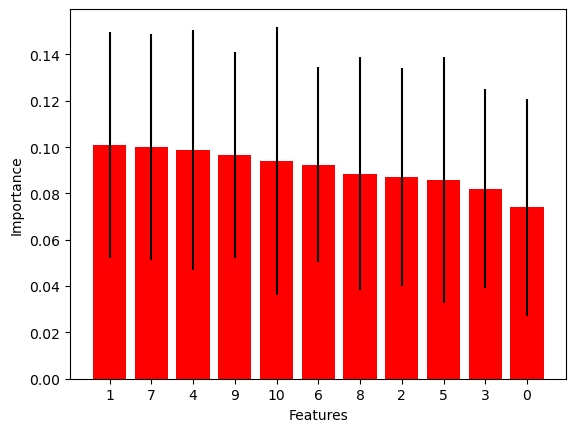

In [818]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc = RandomForestClassifier()
rfc.fit(X_train, preprocessing.LabelEncoder().fit_transform(y_train['y1']))
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

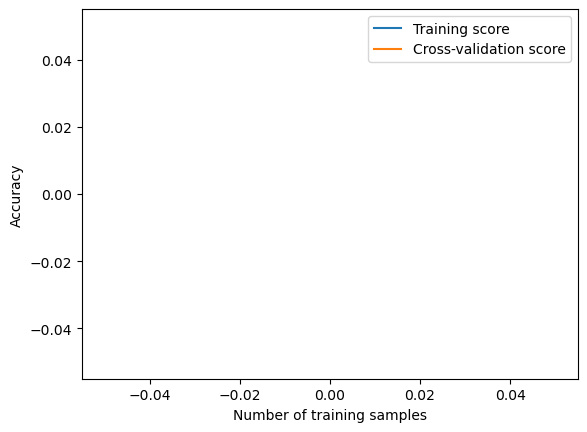

In [819]:
from sklearn.model_selection import learning_curve

y_train = y_train['y1']
# y_train = preprocessing.LabelEncoder().fit_transform(y_train['y1'])
estimator = RandomForestClassifier(n_estimators=1000, max_depth=100, min_samples_leaf=1)
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=2, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

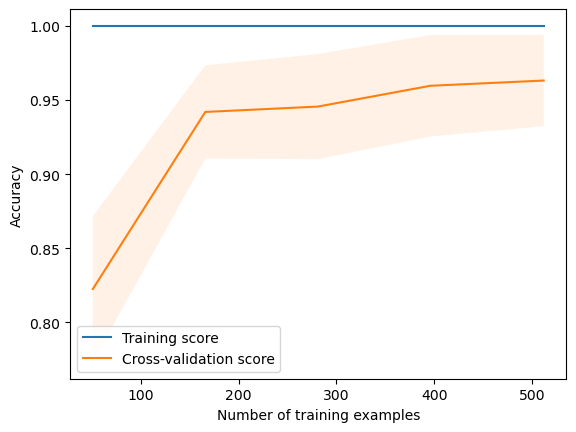

In [820]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
data = load_breast_cancer()
X, y = data.data, data.target

# Определение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Вычисление кривых обучения
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=10, scoring='accuracy', n_jobs=-1)

# Вычисление средних значений и стандартных отклонений
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Построение графика обучения
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [821]:
# submission = pd.DataFrame({
#         "PassengerId": test_df["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('output/submission1.csv', index=False)